In [4]:
import pandas as pd

In [3]:
pip install pandas matplotlib scikit-learn tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 15.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 16.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 5.4 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 13.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 14.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 15.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 16.8 MB/s et

In [5]:
file_path = '/Users/wilbert/Downloads/PBANSOPUSDM.csv'

In [6]:
data = pd.read_csv(file_path)

In [7]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

In [10]:
import matplotlib.pyplot as plt

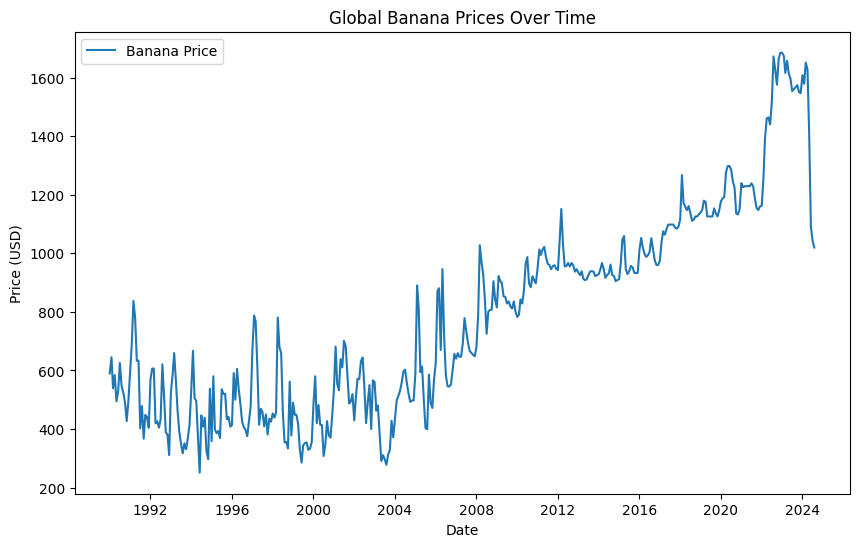

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['PBANSOPUSDM'], label='Banana Price')
plt.title('Global Banana Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [12]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)

In [17]:
def create_sequences(data, look_back=12):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

In [18]:
look_back = 12
X_train, y_train = create_sequences(scaled_train, look_back)

In [19]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2602  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0285 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 


In [26]:
scaled_test = scaler.transform(test)

In [27]:
X_test, y_test = create_sequences(scaled_test, look_back)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [28]:
predictions = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [29]:
predicted_prices = scaler.inverse_transform(predictions)


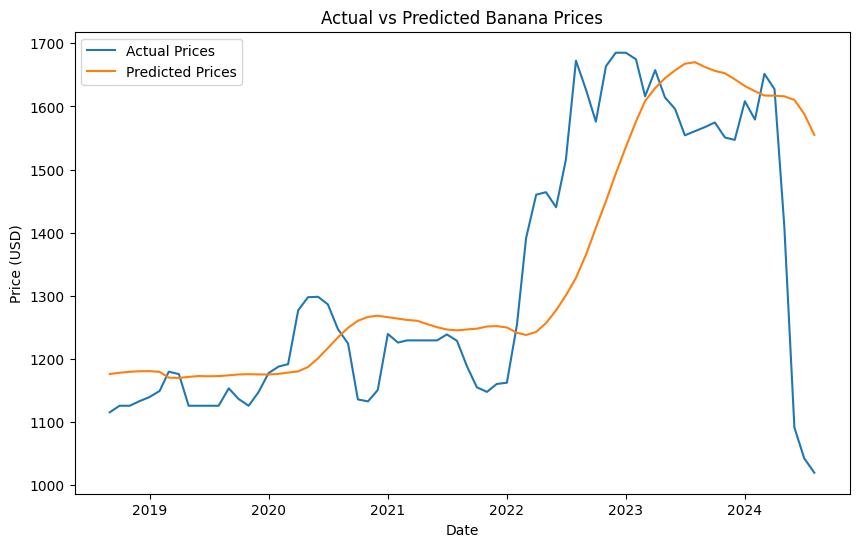

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(test.index[look_back:], test['PBANSOPUSDM'][look_back:], label='Actual Prices')
plt.plot(test.index[look_back:], predicted_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Banana Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [32]:
mae = mean_absolute_error(test['PBANSOPUSDM'][look_back:], predicted_prices)
rmse = np.sqrt(mean_squared_error(test['PBANSOPUSDM'][look_back:], predicted_prices))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 98.82134509376114
RMSE: 150.87368558288128


In [34]:
model.save('my_model.keras')

In [53]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [51]:
print(type(scaler))

<class 'sklearn.preprocessing._data.MinMaxScaler'>


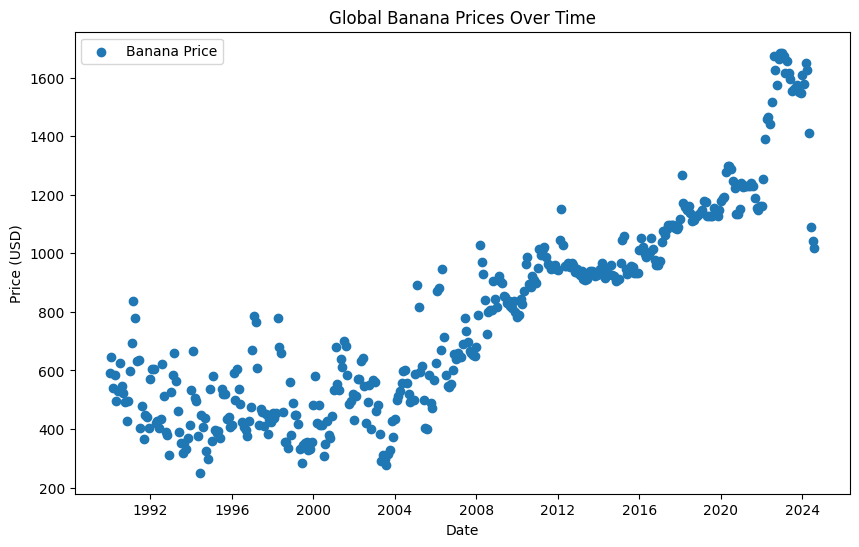

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['PBANSOPUSDM'], label='Banana Price')
plt.title('Global Banana Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
import joblib